# Name - Sumit Raj

### Data Science Intern
### Bharat Intern - Feb/2024
### Allocated Project - Cat and Dog Image Classifier

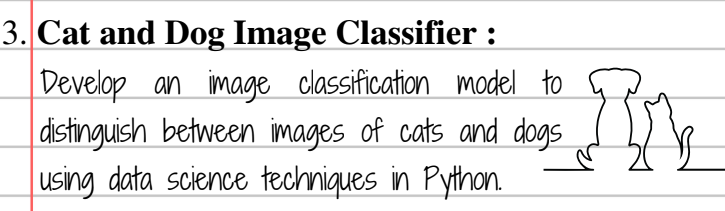

In [28]:
pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 495.5 kB/s eta 0:01:18
   ---------------------------------------- 0.2/38.6 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.3/38.6 MB 2.0 MB/s eta 0:00:19
    --------------------------------------- 0.5/38.6 MB 2.6 MB/s eta 0:00:15
    --------------------------------------- 0.8/38.6 MB 3.1 MB/s eta 0:00:13
   - -------------------------------------- 1.0/38.6 MB 3.3 MB/s eta 0:00:12
   - -------------------------------------- 1.2/38.6 MB 3.6 MB/s eta 0:00:11
   - -------------------------------------- 1.5/38.6 MB 3.8 MB/s eta 0:00:10
   - ---------------

In [29]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('C:/Users/CODER/Desktop/Bharat Intern/CnDImClass/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/CODER/Desktop/Bharat Intern/CnDImClass/data\Thumbs.db
C:/Users/CODER/Desktop/Bharat Intern/CnDImClass/data\Cat\000122_ZV_SCSW_HeroImages_1900x1024_D1.jpg
C:/Users/CODER/Desktop/Bharat Intern/CnDImClass/data\Cat\00tb-cats1-videoSixteenByNine3000.jpg
C:/Users/CODER/Desktop/Bharat Intern/CnDImClass/data\Cat\07CAT-STRIPES-superJumbo.jpg
C:/Users/CODER/Desktop/Bharat Intern/CnDImClass/data\Cat\1169131-two-cats-outside-banner_990x350.jpg
C:/Users/CODER/Desktop/Bharat Intern/CnDImClass/data\Cat\1181276-tortoise-shell-cat-on-garden-chair-banner_990x350.jpg
C:/Users/CODER/Desktop/Bharat Intern/CnDImClass/data\Cat\1200px-Cat03.jpg
C:/Users/CODER/Desktop/Bharat Intern/CnDImClass/data\Cat\1200px-RedCat_8727.jpg
C:/Users/CODER/Desktop/Bharat Intern/CnDImClass/data\Cat\1521-WIRED-Cat.jpeg
C:/Users/CODER/Desktop/Bharat Intern/CnDImClass/data\Cat\1E3A3E62-B3CA-434A-8C3B3ED0C982FB69_source.jpg
C:/Users/CODER/Desktop/Bharat Intern/CnDImClass/data\Cat\1_5978274.jpg
C:/Users/CODER/Desktop/Bharat 

In [30]:
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import imghdr

%matplotlib inline

C:\Users\CODER\AppData\Local\Temp\ipykernel_8804\1136395143.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [31]:
data = tf.keras.utils.image_dataset_from_directory('C:/Users/CODER/Desktop/Bharat Intern/CnDImClass/data')

Found 1157 files belonging to 4 classes.


In [32]:
data_iterate = data.as_numpy_iterator()

In [33]:
batch = data_iterate.next()

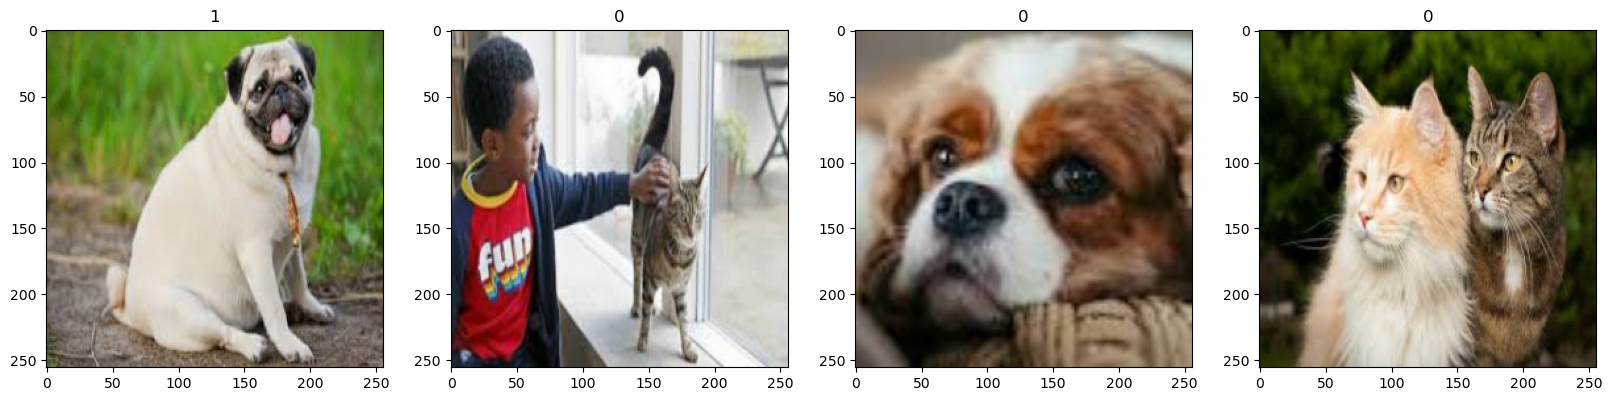

In [34]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [35]:
data = data.map(lambda x,y : (x/255,y))

In [36]:
data.as_numpy_iterator().next()

(array([[[[0.72570467, 0.5217831 , 0.37668505],
          [0.7781556 , 0.56927085, 0.4266544 ],
          [0.83429843, 0.60848653, 0.47329962],
          ...,
          [0.5023897 , 0.5768995 , 0.6945466 ],
          [0.48875612, 0.5632659 , 0.680913  ],
          [0.48978248, 0.56429225, 0.68193936]],
 
         [[0.72570467, 0.5217831 , 0.37668505],
          [0.7781556 , 0.56927085, 0.4266544 ],
          [0.83429843, 0.60848653, 0.47329962],
          ...,
          [0.505913  , 0.5804228 , 0.6980699 ],
          [0.4922794 , 0.5667892 , 0.68443626],
          [0.49172992, 0.5662397 , 0.68388677]],
 
         [[0.72570467, 0.5217831 , 0.37668505],
          [0.7781556 , 0.56927085, 0.4266544 ],
          [0.83429843, 0.60848653, 0.47329962],
          ...,
          [0.5110283 , 0.5855381 , 0.70318514],
          [0.49756435, 0.5720741 , 0.6897212 ],
          [0.49479496, 0.56930476, 0.6869518 ]],
 
         ...,
 
         [[0.66752124, 0.44920015, 0.35148263],
          [0.63604

In [37]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [38]:
train_size

25

In [39]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [40]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D,Dense,Flatten,Dropout

In [42]:
model = Sequential()

In [43]:
model.add(Conv2D(16, (3,3), 1, activation='relu', padding = 'same', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Conv2D(32, (3,3), 1, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Conv2D(16, (3,3), 1, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.compile("adam",loss=tf.losses.BinaryCrossentropy(),metrics=["accuracy"])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 16)        0

In [46]:
logdir = "logs"

In [47]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [48]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])
print(hist.history)

best_score = max(hist.history['val_accuracy'])

print(f"Best Validation score is: {best_score}")

Epoch 1/50
25/25 [==============================] - 65s 2s/step - loss: 1.0735 - accuracy: 0.5125 - val_loss: 0.6927 - val_accuracy: 0.4911
Epoch 2/50
25/25 [==============================] - 61s 2s/step - loss: 0.6901 - accuracy: 0.5200 - val_loss: 0.6796 - val_accuracy: 0.6473
Epoch 3/50
25/25 [==============================] - 61s 2s/step - loss: 0.6585 - accuracy: 0.6425 - val_loss: 0.6247 - val_accuracy: 0.6875
Epoch 4/50
25/25 [==============================] - 62s 2s/step - loss: 0.5770 - accuracy: 0.7038 - val_loss: 0.6206 - val_accuracy: 0.6741
Epoch 5/50
25/25 [==============================] - 60s 2s/step - loss: 0.4730 - accuracy: 0.7713 - val_loss: 0.5063 - val_accuracy: 0.7411
Epoch 6/50
25/25 [==============================] - 60s 2s/step - loss: 0.3565 - accuracy: 0.8163 - val_loss: 0.5606 - val_accuracy: 0.7455
Epoch 7/50
25/25 [==============================] - 58s 2s/step - loss: 0.2410 - accuracy: 0.8700 - val_loss: 0.5693 - val_accuracy: 0.7857
Epoch 8/50
25/25 [==

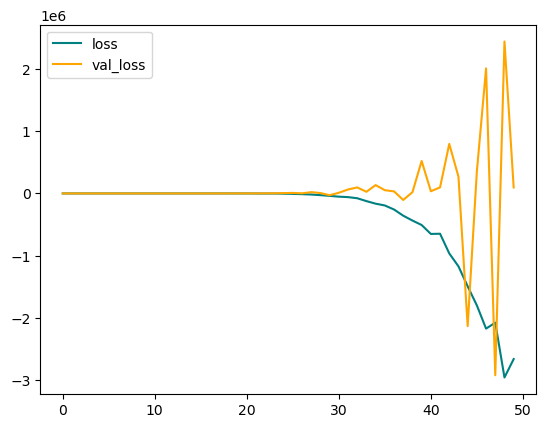

In [49]:
ig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

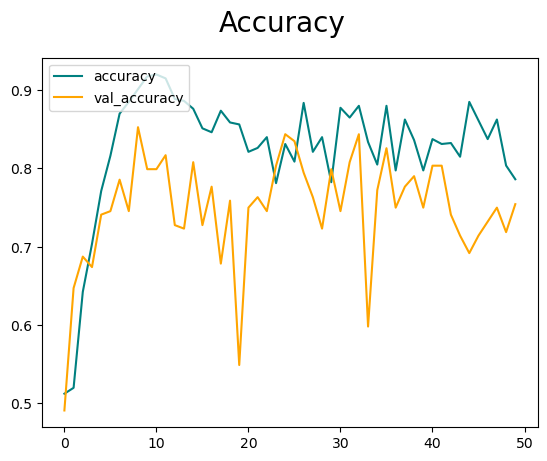

In [50]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [51]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [52]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [53]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 522ms/step


In [54]:
print(f"Precision: {pre.result().numpy()} , Recall: {re.result().numpy()}, BinaryAccuracy: {acc.result().numpy()}")

Precision: 0.8148148059844971 , Recall: 0.47826087474823, BinaryAccuracy: 0.6979166865348816


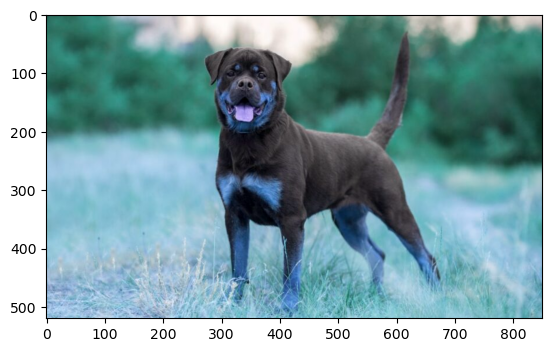

In [57]:
img = cv2.imread("C:/Users/CODER/Desktop/Bharat Intern/CnDImClass/data/dog_test2.jpg")
plt.imshow(img)
plt.show()

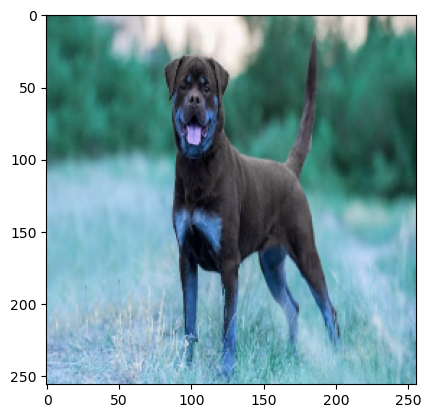

In [58]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

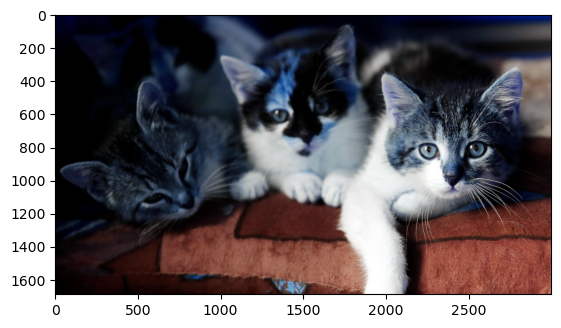

In [60]:
img2 = cv2.imread("C:/Users/CODER/Desktop/Bharat Intern/CnDImClass/data/Cat/00tb-cats1-videoSixteenByNine3000.jpg")
plt.imshow(img2)
plt.show()

In [61]:
yhat = model.predict(np.expand_dims(resize/225,0))

1/1 [==============================] - 0s 113ms/step


In [62]:
yhat

array([[1.]], dtype=float32)

In [63]:
if yhat > 0.5: 
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Dog
